<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *5*: *Naive Bayes & KNN Classification***

###**Tenggat Waktu: 4 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab5_NPM_Nama.ipynb**. Contoh: A_Lab5_2106123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 Maret 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

# **Pertanyataan Integritas**

In [ ]:
# Isi dengan data diri Anda
NAMA = "Alvaro Austin"
KELAS = "B"
NPM = "2106752180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

# Kaggle Username
KAGGLE = ["AlvaroAustin"]

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

import warnings
warnings.filterwarnings('ignore')

Saya, Alvaro Austin dari kelas B dengan NPM 2106752180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alvaro Austin)


# Naive Bayes

## A. Pengenalan Naive Bayes

Tugas Anda kali ini adalah mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.




 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (A? B? AB? atau O?) berdasarkan sifat karakter seseorang (arogan? perhatian? teliti? cerdas? sabar?). Anda akan membentuk sebuah kuesioner kepribadian dan memberikan kuesioner tersebut ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Lulu mengatakan kepada Anda bahwa dia adalah orang yang perhatian, cerdas, teliti, dan sabar. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Lulu?.

Salah satu cara untuk memprediksi golongan darah Kak Lulu adalah dengan menggunakan teorema Naive Bayes. Jika saya ingin menghitung peluang golongan darah Kak Lulu adalah O karena diketahui Kak Lulu adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Bayes Rule yang ditunjukkan di bawah ini.





$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{\sum_{O'} p(O')p(\text{perhatian} \mid O')}
$$

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung P(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh p(perhatian). Sama halnya, p(A | perhatian), p(B | perhatian), dan P(AB | perhatian) juga dibagi dengan p(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


$$
p(A \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid A)p(A)}{p(\text{perhatian})}
$$

$$
p(B \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid B)p(B)}{p(\text{perhatian})}
$$

$$
p(AB \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid AB)p(AB)}{p(\text{perhatian})}
$$

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{p(\text{perhatian})}
$$

**Konsep yang perlu diperhatikan:**

* `p(A | perhatian)` disebut sebagai posterior distribution
* `p(A)` sebagai prior distribution

* `Marginalization`: "menghitung" atau "menjumlahkan" probabilitas dari suatu variabel acak berdasarkan distribusi probabilitas bersama dengan variabel lain sebagai contoh:
> $$
p(X) = \sum_{y} p(X, Y = y)
$$


**Konsep Tambahan: Class Conditional Density**

Dalam konteks pembelajaran mesin dan statistik, densitas kondisional kelas mengacu pada fungsi densitas probabilitas (PDF) dari suatu fitur atau variabel tertentu yang diberikan kelas atau kategori tertentu. Ini digunakan dalam masalah klasifikasi di mana Anda ingin memodelkan distribusi probabilitas fitur dalam setiap kelas untuk membuat prediksi.

Secara sederhana, ini adalah distribusi probabilitas dari suatu fitur yang diberikan kelas tertentu. Sebagai contoh, dalam masalah klasifikasi biner dengan dua kelas (Kelas A dan Kelas B), densitas kondisional kelas dari suatu fitur (misalnya, tinggi) akan menggambarkan bagaimana tinggi individu didistribusikan dalam setiap kelas. Ini memungkinkan Anda untuk menilai kemungkinan mengamati nilai tertentu dari fitur dalam kelas tertentu.

Secara matematis, Anda dapat menunjukkan densitas kondisional kelas sebagai P(X | C), di mana X adalah fitur, dan C adalah kelas. Ini menggambarkan kemungkinan mengamati nilai tertentu dari fitur X dengan asumsi bahwa data tersebut termasuk dalam kelas C.

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (p(perhatian)) dicoret? Sehingga kita tidak perlu untuk menghitung nilai dari p(perhatian).

$$
p(O \mid \text{perhatian}) ∝ p(\text{perhatian}\mid O) p(O)
$$

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O bila hanya faktor bahwa Kak Lulu itu perhatian diperhitungkan. Bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


\begin{align}
p(O \mid P,T,S,C) &\propto p(O)p(P,T,S,C\mid O)
\end{align}


Keterangan :
*   T: teliti
*   C: cerdas
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Untungnya, dalam konteks Naive Bayes Classifier, kita dapat mengasumsikan bahwa faktor seperti
teliti, cerdas, dan sebagainya saling conditionally independent atau independensi bersyarat jika O diketahui. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

\begin{align}
p(P,T,S,C \mid O) = p(P\mid O) p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

Dengan demikian, berlaku bahwa


\begin{align}
p(O \mid P,T,S,C) &\propto p(O) p(P,T,S,C \mid O) \\
&= p(O) p(P\mid O)  p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

## B. Pengenalan Naive Bayes Dalam Sckitlearn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini mengasumsikan bahwa class conditional density (distribusi fitur untuk masing-masing kelas) mengikuti distribusi Gaussian (distribusi kontinu).
Model ini cocok digunakan untuk  data numerik yang mengikuti distribusi gaussian dan kontinu.

- Multinomial Naive Bayes,
Asumsi data yang digunakan bahwa class conditional density mengikuti distribusi multinomial.
Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Distribusi ini generalisasi dari distribusi Binomial, tapi untuk data dengan kategori lebih dari 2. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced.
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentais modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. Hands-on Naive Bayes

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [ ]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [ ]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64 

No. of unique values in column Blood of Pressure:
Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64 

No. of unique values in column Heart Problem:
apt      50
inept    30
Name: Heart Problem, dtype: int64 

No. of unique values in column Caesarian:
Yes    46
No     34
Name: Caesarian, dtype: int64 



### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding (Natural Progression)
* Vector encoding
* etc


Pada kasus kali ini kita menggunakan one hot encoding dengan tujuan agar data dapat lebih dimengerti dengan baik tanpa memperhatikan atau terkena dampak urutan.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Proses Encoding menggunakan Label encoding
le = LabelEncoder()

disc_col = [column for column in caesarian.columns if column != 'Age']

for col in disc_col:
  caesarian[col] = le.fit_transform(caesarian[col])

caesarian

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,2,0,0,0
1,26,2,2,0,1
2,26,1,2,0,0
3,28,2,0,0,0
4,22,2,2,0,1
...,...,...,...,...,...
75,27,1,2,0,0
76,33,2,2,0,1
77,29,1,0,0,1
78,25,0,1,0,1


In [ ]:
# Variabel independen
x = caesarian.drop(["Caesarian"], axis = 1)
x.head()

,Age,Delivery No,Blood of Pressure,Heart Problem
0,22,2,0,0
1,26,2,2,0
2,26,1,2,0
3,28,2,0,0
4,22,2,2,0


In [ ]:
# Variabel dependen
y = caesarian["Caesarian"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian, dtype: int64

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [ ]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 123)

Kemudian kita akan melakukan cross validation dengan number_split = 5. Cross Validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini dapat Anda gunakan untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes, mengevaluasi hasil kfold, dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

continuous_cols = ['Age']
discrete_cols   = [col for col in caesarian.columns if col not in continuous_cols and col != 'Caesarian']

x_train_continuous = x_train[continuous_cols]
x_train_discrete   = x_train[discrete_cols]

x_test_continuous = x_test[continuous_cols]
x_test_discrete   = x_test[discrete_cols]

In [ ]:
model_gnb = GaussianNB() # For numeric
model_gnb.fit(x_train_continuous, y_train)

GaussianNB()

In [ ]:
model_cnb = CategoricalNB() # For categorical
model_cnb.fit(x_train_discrete, y_train)

CategoricalNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test namun karena fitur didalamnya bersifat campuran, maka kita akan melakukan treatment yang berbeda antara fitur kontinu dan fitur diskrit lalu kemudian akan menggabungkan keduanya.

In [ ]:
categorical_posteriors = model_cnb.predict_proba(x_test_discrete)
numerical_posteriors   = model_gnb.predict_proba(x_test_continuous)

combined_probabilities = categorical_posteriors * numerical_posteriors

# Get the class with the highest combined probability as the final prediction
# Bisa dikatakan juga sebagai hasil prediksi dari data uji yang ada
final_predictions = np.argmax(combined_probabilities, axis=1)
final_predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [ ]:
# Array data test
np.array(y_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
evaluate_classifier_performance(final_predictions,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.67      0.89      0.76         9

    accuracy                           0.69        16
   macro avg       0.71      0.66      0.65        16
weighted avg       0.70      0.69      0.67        16



Confusion Matrix



prediction,0,1
actual,,
0,3,4
1,1,8




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.6875
F1 Macro Average: 0.6536796536796536
F1 Micro Average: 0.6875
Precision Macro Average: 0.7083333333333333
Precision Micro Average: 0.6875
Recall Macro Average: 0.6587301587301587
Recall Micro Average: 0.6875



Berdasarkan report diatas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik (<b>OH TIDAK!</b>). Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak balance <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma naive bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# KNN (K-Nearest Neighbors)

## A. Pengenalan KNN

Sesuai dengan namanya (<i>nearest neighbors</i>), algoritma ini mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang lainnya. Contoh, kamu mempunyai dataset yang berisi informasi rumah dengan label rumah mewah dan rumah tidak mewah. KNN akan menyimpan informasi mengenai ukuran yang serupa, seperti kemiripan luas rumah dan juga harga rumah. Ketika data rumah baru masuk, KNN akan mengecek kesamaan informasi data rumah tersebut terhadap data lama yang telah dipelajari KNN. Hasil pengecekan akan dijadikan sebagai kesimpulan rumah baru tersebut masuk ke dalam klasifikasi yang mana.

Apa saja yang perlu kita perhatikan sebelum mengimplementasikan KNN?
* <b>Jumlah K</b> <br>
Jumlah K sangat menentukan performa KNN. K merepresentasikan jumlah data point terdekat, yang akan digunakan untuk menentukan suatu data point masuk ke dalam kategori apa. K yang kecil sangat rentan dengan <i>noise</i> yang dapat membuat model overfitting, sedangkan K yang besar dapat merusak aspek <i>lokalitas</i> yang berujung ke penurunan performa model klasifikasi.<br>


* <b>Rumus Jarak yang digunakan</b> <br>
Rumus jarak yang digunakan untuk menghitung kedekatan data point terhadap data yang lainnya juga sangat menentukan performa dari algoritma KNN. Jika perhitungan jarak yang digunakan kurang sesuai, maka kalkulasi similarity akan tidak tepat dan berujung membuat klasifikasi menjadi tidak sesuai

## B. Pengenakan KNN Pada Scikit-Learn

Referensi : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pada scikit-learn, ada beberapa parameter yang perlu kita perhatikan, berikut adalah rangkuman singkatnya.

* `n_neighbor` <br>
n_neighbor merepresentasikan jumlah K yang kita gunakan, dengan default nilai adalah 5 <br>
* `algorithm` <br>
parameter algorithm merepresentasikan algoritma yang digunakan dalam mencari tetangga terdekat. Algoritma yang tersedia adalah, ball tree, kd tree, brute force, dan auto. Default nilai dari parameter ini adalah auto <br>
* `p` <br>
parameter ini merepresentasikan parameter yang digunakan untuk metric. Jika menggunakan minkowski, maka p bernilai 1 digunakan untuk manhattan distance dan p bernilai 2 untuk euclidean distance. Default dari parameter ini adalah 2, yaitu euclidean distance <br>
* `metric` <br>
parameter ini digunakan untuk menentukan rumus jarak yang dipakai. Default dari nilai ini adalah minkowski. <br>

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai k yang optimal adalah dengan <b> cross validation </b> sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data (jika semua numerik mungkin kita bisa memilih untuk menggunakan euclidean atau manhattan, dan jika semua kategorik bisa menggunakan jacard distance). Permasalahan yang selalu ditemukan saat mengimplementasikan KNN adalah, ketika independent variable yang ada terdiri dari data <b>kategorik</b> dan <b>numerik</b>. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma decision tree, random forest, neural network, deep learning, dan lain-lain.

Dokumentasi mengenai terkait rumus jarak apa saja yang dapat digunakan, dapat diakses disini : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

## C. Hands-on KNN

Kita akan coba mengimplementasikan KNN untuk mengklasifikasikan obat yang harus dikonsumsi oleh seorang pasien dengan menggunakan dataset `drug.csv` yang diambil dari:

(https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set)

dengan modifikasi

Berikut adalah informasi dari dataset diatas :

`RI` : Refractive Index

`Na` : Sodium (unit measurement: weight percent in the corresponding oxide, as
are attributes 4-10)

`Mg` : Magnesium

`Al` : Alumnium

`Si` : Silicon

`K` : Potassium

`Ca` : Calcium

`Ba` : Barium

`Fe` : Iron

`type` : Type of glass

### Import Dataset

In [ ]:
glass = pd.read_csv('glass.csv').rename(columns={
    'Type of glass': 'type'
}).drop(columns=['Id'])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", glass.shape[0])
print("Kolom : ", glass.shape[1])

----Informasi Baris dan Kolom----
Baris :  214
Kolom :  10


### Preprocessing

In [ ]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
check_null(glass)

Tidak ditemukan missing value pada dataset


In [ ]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [ ]:
print("Jumlah duplikasi data : " + str(glass.duplicated().sum()))

Jumlah duplikasi data : 1


In [ ]:
glass.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi data : " + str(glass.duplicated().sum()))

Jumlah duplikasi data : 0


<Axes: >

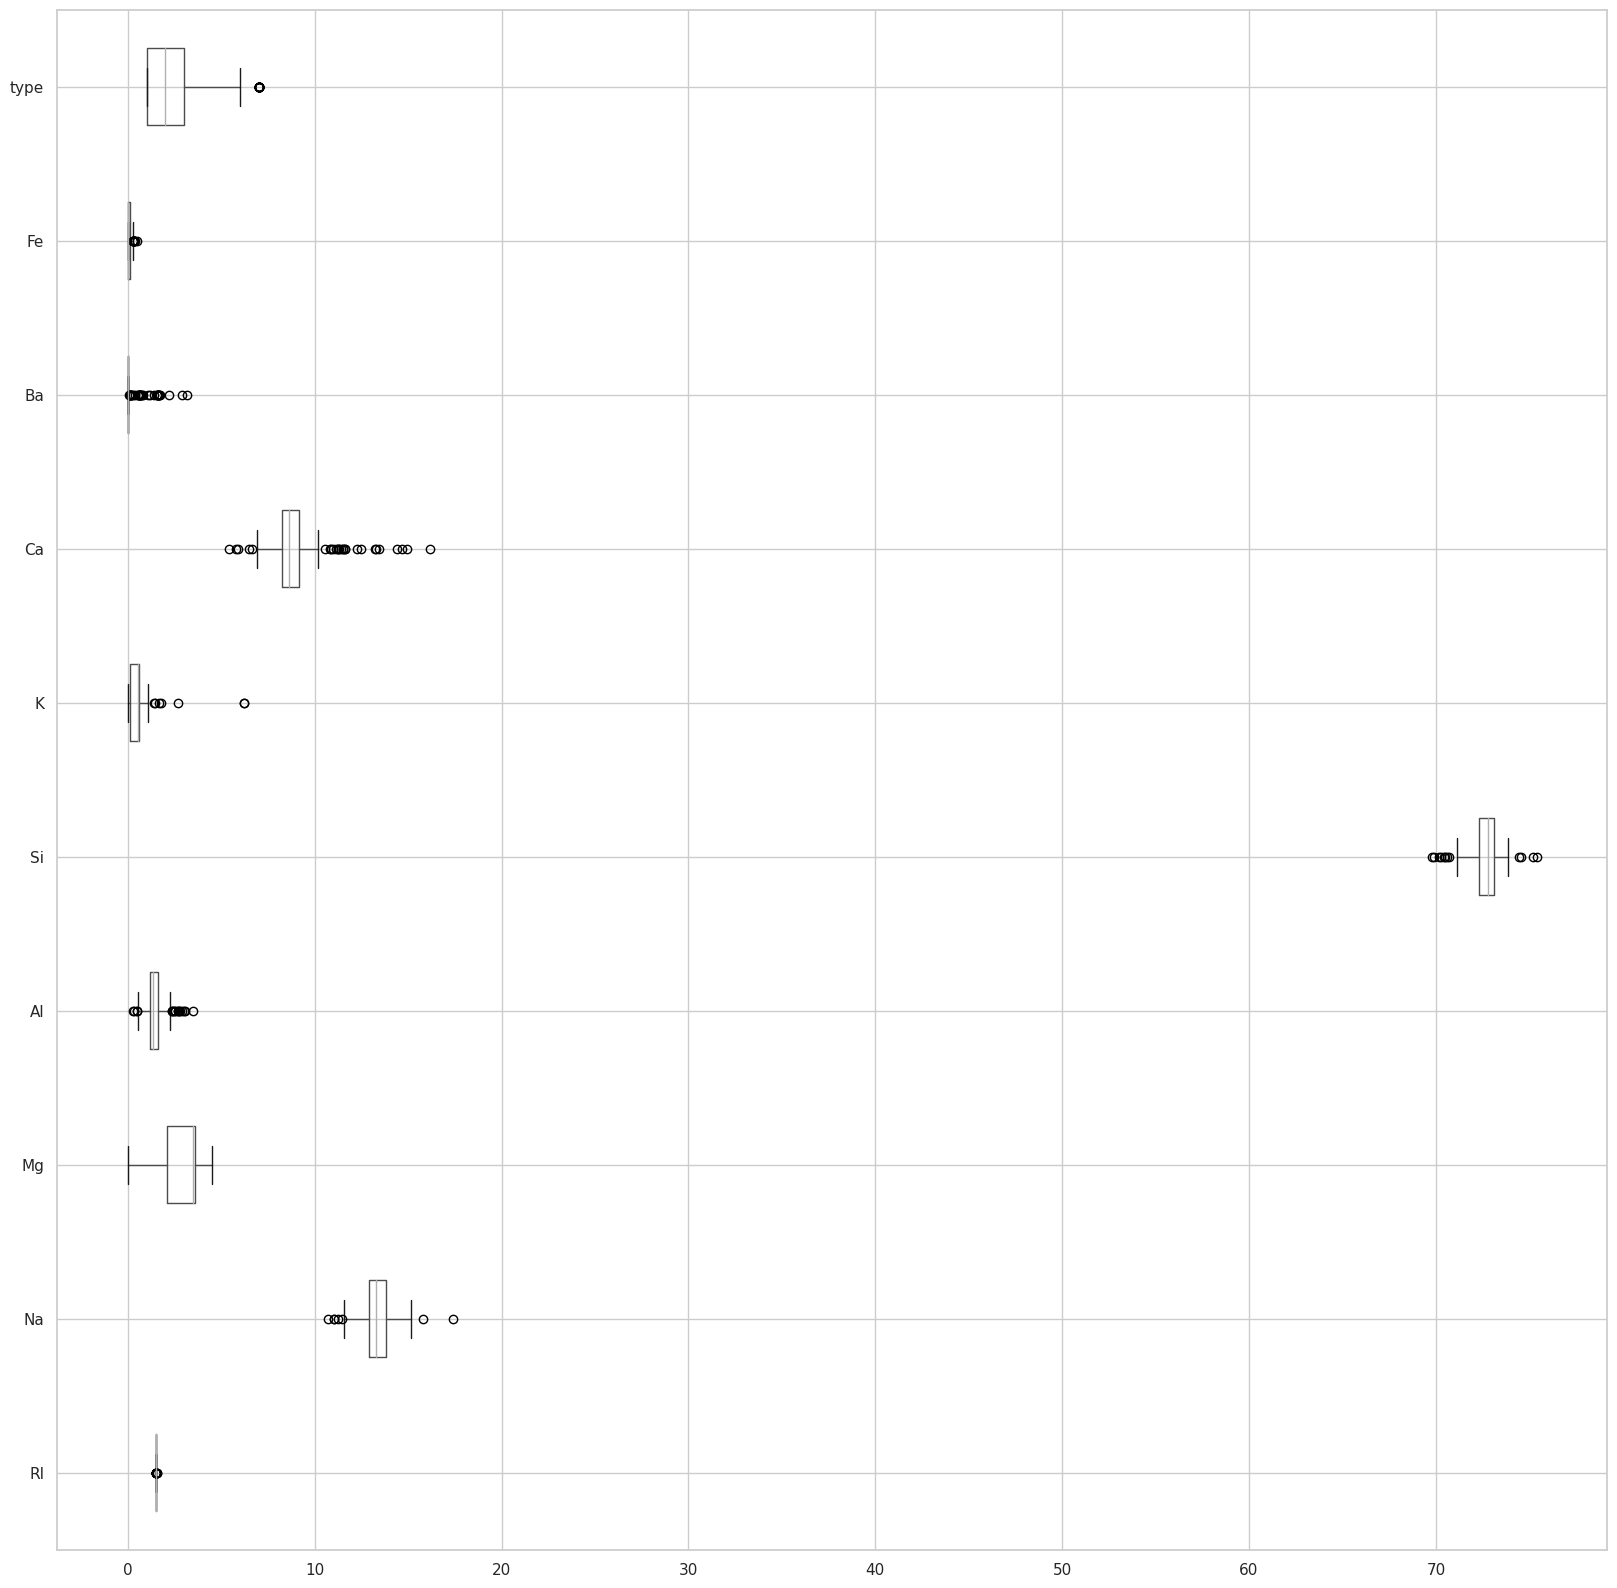

In [ ]:
glass.boxplot(vert=False,figsize=(20,20))

Pada boxplot diatas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu lagi penanganan terhadap outlier.

In [ ]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [ ]:
outliers = dict(check_outlier(glass).sum())

Outlier pada tiap atribut:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
type    29
dtype: int64


Untuk kemudahan implementasi kita berasumsi bahwa *acceptance threshold* untuk outlier yang kita maklumi adalah 17 sehingga kita akan membuang kolom dengan jumlah outlier >= 17

In [ ]:
drop_col = [key for key, val in outliers.items() if val >= 17]
drop_col.remove('type')
drop_col

['RI', 'Al', 'Ca', 'Ba']

In [ ]:
glass = glass.drop(columns=drop_col)
glass.head()

,Na,Mg,Si,K,Fe,type
0,13.64,4.49,71.78,0.06,0.0,1
1,13.89,3.60,72.73,0.48,0.0,1
2,13.53,3.55,72.99,0.39,0.0,1
3,13.21,3.69,72.61,0.57,0.0,1
4,13.27,3.62,73.08,0.55,0.0,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
cleanData = glass.copy()

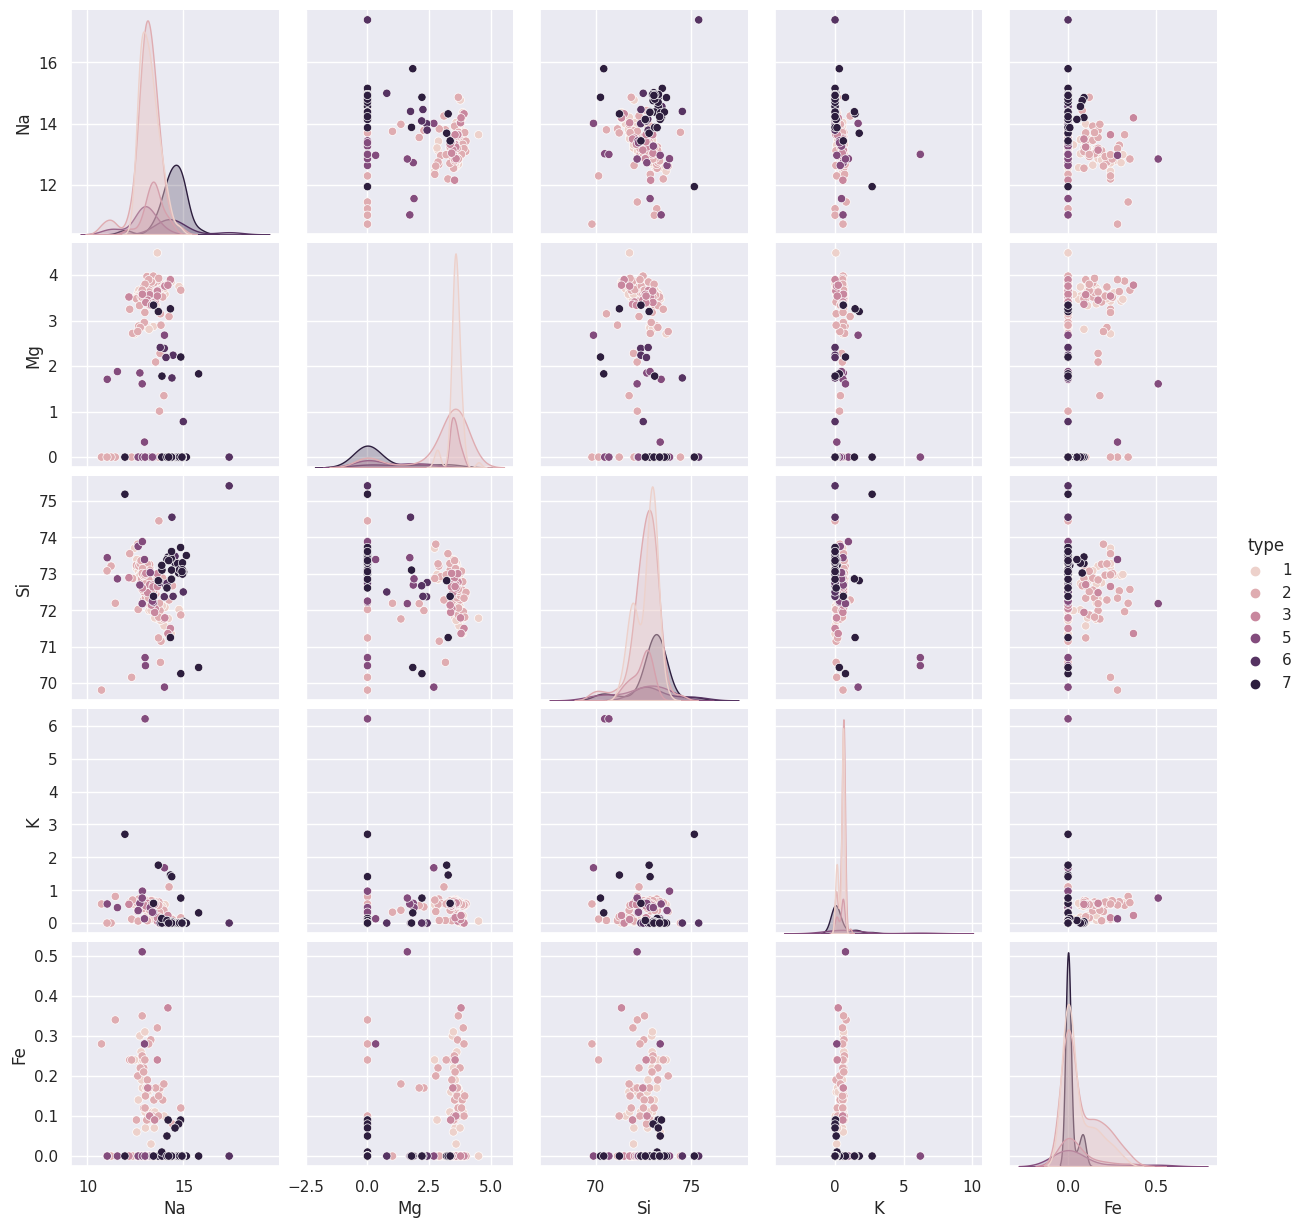

In [ ]:
sns.pairplot(cleanData,hue ='type')

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan dependent variable dan independent variables

Karena target prediksi kita disini adalah <b>type</b>, maka variable **type** akan menjadi variable dependent dan variable yang lainnya akan menjadi variable independent.

Sebelum menentukan independent variables atau features yang akan kita gunakan pada model, kita akan melakukan feature selection terlebih dahulu untuk memilih variable-variable terbaik. Karena data <b>feature</b> kita bersifat numerik atau kontinuos, dan data target kita kategorik, maka kita akan memilih strategi <b> ANOVA </b> atau analysis of variance dalam melakukan feature selection. Berikut adalah contohnya.

Referensi : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
X_raw = cleanData.drop(["type"],axis=1)
y     = cleanData["type"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Kita akan memilih 3 variable terbaik dari independent variable kita untuk dilatih pada model. Berikut adalah contoh code-nya.

In [ ]:
selector = SelectKBest(f_classif, k=3)
X = selector.fit_transform(X_raw, y)

<i> Note </i> : <br>
Perhatikan, pemilihan feature harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [ ]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 3


In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Na', 'Mg', 'K'], dtype=object)

Dari hasil feature selection yang ada kita akan mengambil 4 fitur yaitu `Na`, `Mg`, dan `K`. Selanjutnya, kita akan membagi dataset menjadi testing dan training dengan ukuran yang sama pada proses Naive Bayes. Berikut adalah caranya.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

### Standarization

Sebelum melakukan KNN, kita perlu standarisasi nilai independent variables kita. Hal ini <b>cukup penting</b> dilakukan dalam KNN, karena range nilai yang berbeda-beda dapat mengganggu perhitungan jarak ketika algoritma dijalankan.

Pada tahapan ini, kita akan memilih menggunakan min max scaler saja, berikut adalah caranya.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Mengatur jumlah neighbor yang digunakan.
N_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

Teman-teman dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. By default, jika tidak ditambahkan, nilai parameter tersebut adalah minkowski.

#### KNN dengan Euclidean Distance

In [ ]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.565060908084164


In [ ]:
y_pred = KNN_euclidean.predict(X_test_scaled)
y_pred

array([1, 7, 2, 1, 1, 2, 1, 7, 2, 7, 2, 3, 1, 2, 1, 7, 1, 2, 2, 1, 5, 7,
       1, 3, 2, 3, 2, 6, 1, 2, 2, 5, 1, 7, 2, 3, 1, 2, 1, 1, 2, 1, 1])

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.56      0.64      0.60        14
           2       0.71      0.67      0.69        15
           3       0.25      0.33      0.29         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         6

    accuracy                           0.60        43
   macro avg       0.53      0.50      0.51        43
weighted avg       0.61      0.60      0.60        43



Confusion Matrix



prediction,1,2,3,5,6,7
actual,,,,,,
1,9,2,3,0,0,0
2,5,10,0,0,0,0
3,2,0,1,0,0,0
5,0,1,0,2,0,0
6,0,0,0,0,0,2
7,0,1,0,0,1,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.6046511627906976
F1 Macro Average: 0.5070060207991243
F1 Micro Average: 0.6046511627906976
Precision Macro Average: 0.5322420634920635
Precision Micro Average: 0.6046511627906976
Recall Macro Average: 0.496031746031746
Recall Micro Average: 0.6046511627906976



#### KNN Dengan Manhattan Distance

In [ ]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6121262458471761


In [ ]:
y_pred = KNN_manhattan.predict(X_test_scaled)
y_pred

array([1, 7, 2, 1, 1, 2, 1, 7, 2, 7, 2, 3, 1, 2, 1, 7, 1, 1, 2, 1, 5, 7,
       1, 3, 2, 1, 2, 2, 1, 2, 2, 5, 1, 7, 3, 3, 1, 2, 1, 1, 2, 1, 1])

In [ ]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.56      0.71      0.63        14
           2       0.62      0.53      0.57        15
           3       0.25      0.33      0.29         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.67      0.67      0.67         6

    accuracy                           0.58        43
   macro avg       0.51      0.49      0.49        43
weighted avg       0.58      0.58      0.57        43



Confusion Matrix



prediction,1,2,3,5,7
actual,,,,,
1,10,2,2,0,0
2,6,8,1,0,0
3,2,0,1,0,0
5,0,1,0,2,0
6,0,0,0,0,2
7,0,2,0,0,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5813953488372093
F1 Macro Average: 0.491468253968254
F1 Micro Average: 0.5813953488372093
Precision Macro Average: 0.5146011396011396
Precision Micro Average: 0.5813953488372093
Recall Macro Average: 0.4857142857142857
Recall Micro Average: 0.5813953488372093



#### KNN dengan Jaccard Distance

In [ ]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=4)

In [ ]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.341500553709856


In [ ]:
y_pred = KNN_jaccard.predict(X_test_scaled)
y_pred

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.38      0.93      0.54        14
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.30        43
   macro avg       0.06      0.15      0.09        43
weighted avg       0.12      0.30      0.18        43



Confusion Matrix



prediction,1,2,6
actual,,,
1,13,0,1
2,15,0,0
3,3,0,0
5,2,1,0
6,0,2,0
7,1,5,0




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.3023255813953488
F1 Macro Average: 0.09027777777777779
F1 Micro Average: 0.3023255813953488
Precision Macro Average: 0.06372549019607843
Precision Micro Average: 0.3023255813953488
Recall Macro Average: 0.15476190476190477
Recall Micro Average: 0.3023255813953488



Berdasarkan hasil evaluasi beberapa model diatas, terlihat pula bahwa model menghasilkan hasil evaluasi yang kurang baik saat menggunakan metric distance Jaccard. Hal tersebut karena Jaccard biasa digunakan untuk menghitung similarity atau dissimilarity di antara fitur-fitur binary/categorical. Oleh karena semua fitur kita sudah dalam bentuk numerik, maka Jaccard kurang baik dalam melakukan perhitungan jarak atribut-atribut tersebut sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik pula.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [ ]:
# Optimalisasi KNN dengan gridsearch CV
# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8],'metric': ['euclidean', 'manhattan', 'jaccard']}]

print("Tuning hyper-parameters model KNN")
print()

clfKNN = GridSearchCV(
    model,
    tunned_params,
    scoring="accuracy",
    cv=kfold,
    verbose = 2
)

clfKNN.fit(X_train_scaled, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

Tuning hyper-parameters model KNN

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

prediction,1,2,3,5,7
actual,,,,,
1,13,1,0,0,0
2,8,7,0,0,0
3,1,1,1,0,0
5,0,1,0,2,0
6,0,0,0,0,2
7,0,2,0,0,4




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.627906976744186
F1 Macro Average: 0.534567901234568
F1 Micro Average: 0.627906976744186
Precision Macro Average: 0.6401515151515151
Precision Micro Average: 0.627906976744186
Recall Macro Average: 0.5103174603174603
Recall Micro Average: 0.627906976744186




Berdasarkan hasil diatas, kita peroleh bahwa nilai k yang paling optimal adalah 2 dengan metric distance manhattan.

Berdasarkan hasil diatas, model yang kita peroleh sudah optimal karena nilai akurasi diatas 60%. Nilai F1 Micro dan Accuracy kita juga sudah diatas 60%, hal ini menandakan bahwa model kita memiliki nilai false positive dan false negative yang rendah.  

# Latihan Soal

## A. Pertanyaan Teoritis (Soal Pertama) [30]

### A. Soal Teoritis Naive Bayes [10]

Teorema Bayes adalah rumus dasar dalam teori probabilitas yang digunakan untuk menghitung probabilitas suatu peristiwa berdasarkan pengetahuan sebelumnya tentang peristiwa tersebut.

* Bagaimana Teorema Bayes digunakan dalam algoritma Naive Bayes?
* Apa asumsi yang digunakan dalam penggunaan algoritma Naive Bayes?

> <b><i>Jawaban</i></b> : <br>
> eorema Bayes:
Teorema Bayes menyatakan bahwa probabilitas suatu peristiwa A, diberikan peristiwa B, dapat dihitung sebagai berikut:
P(A|B) = (P(B|A) * P(A)) / P(B)
<br> Di sini:
<br> 1. P(A|B) adalah probabilitas kondisional peristiwa A diberikan peristiwa B.
<br> 2. P(B|A) adalah probabilitas kondisional peristiwa B diberikan peristiwa A.
<br> 3. P(A) adalah probabilitas prior peristiwa A.
<br> 4. P(B) adalah probabilitas prior peristiwa B.

> Pada Naive Bayes, kita ingin mengklasifikasikan data menjadi salah satu dari beberapa kelas atau label berdasarkan fitur-fitur yang diamati. Algoritma ini mengasumsikan bahwa semua fitur adalah **independen** satu sama lain, meskipun dalam realitasnya mungkin ada korelasi antara beberapa fitur. Selain itu, algoritma ini menggunakan Teorema Bayes untuk menghitung probabilitas kelas berdasarkan fitur-fitur.
Cara nya adalah dengan <br>
misalnya terdapat P(B1=Shifting|A1), p(B2=AvoidEyeContact|A1), p(B3=ActiveFingers|A1) dengan A1 adalah probablitas seorang adalah *werewolf*, A2 adalah *villager* dan Bx merupakan symptom yang dimiliki werewolf. Apabila kita ingin menghitung probabilitas bagi seseorang yang merupakan sebuah werewolf dan mempunyai symptom-symptom diatas, kita akan merepresentasikan nilainya dengan: P(B1, B2, B3 | A1).

> Akan tetapi, bayangkan apabila symptom-symptom yang dimiliki werewolf bertambah (jumlah B bertambah) bertamba, maka hal ini akan membuat perhitungan menjadi lebih sulit tanpa adanya sample yang banyak (biasanya data pada kehidupan nyata tidak banyak). Sehingga disini Naive Bayes dapat digunakan kita untuk mengevaluasi nilai tersebut. Maka apabila kita menggunakan Naive Bayes dimana kita berasumsi bahwa fitur-fitur adalah independen dengan satu dengan yang lain, kita dapat memperoleh:

> P(B1, B2, B3, B4| A1) = P(B1|A1) * P(B2|A1) * P(B3|A1) * P(B4|A1)

> Hal ini akan membuat komputasi jauh lebih ringan.

> Asumsi pada Naive Bayes
Algoritma Naive Bayes mengasumsikan bahwa **semua fitur** adalah **independen satu sama lain**. Ini adalah asumsi yang sederhana, dan dalam banyak kasus, ini tidak selalu benar dalam data nyata. Namun, asumsi ini membantu membuat perhitungan lebih sederhana dan efisien.

> Saya juga melihat beberapa asumsi yang mungkin relevan namun saya tidak menemukan informasi ini pada slide:
1. Algoritma Naive Bayes mengasumsikan bahwa distribusi probabilitas dari fitur-fitur dalam setiap kelas dikenal. Dengan kata lain, kita tahu bagaimana fitur-fitur ini didistribusikan dalam setiap kelas.
2. Algoritma ini tidak mempertimbangkan data latennya. Dengan kata lain, jika ada data yang tidak diamati atau tidak ada dalam kumpulan pelatihan, algoritma tidak dapat menghasilkan prediksi yang akurat.

> <b><i>Referensi</i></b> : <br>
https://wiki.pathmind.com/bayes-theorem-naive-bayes <br>
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

### B. Soal Teoritis KNN [10]

Terdapat satu fenomena yang dialami oleh KNN, yaitu Curse of Dimentionality. Curse of Dimentionality adalah suatu fenomena di mana semakin meningkatnya jumlah fitur (dimensi) pada data dapat menyebabkan semakin menurunnya kinerja serta performa dari model yang dihasilkan. Menurut teman-teman, mengapa hal tersebut bisa terjadi? Kemudian jelaskan hal-hal apa saja yang dapat dilakukan untuk mengatasi masalah tersebut?

> <b><i>Jawaban</i></b> : <br>
Penurunan kinerja serta performa model yang dihasilkan menurut seiiringnya meningkatnya jumlah fitur dalam model KNN disebabkan karena model ini akan menemukan kesulitan:
- Jarak: KNN menggunakan informasi mengenai jarak antara data point untuk menemukan model yang sesuai terhadap input. Dengan meningkatnya jumlah fitur maka perhitungan jarak akan menjadi semakin mahal terutama apabila kita menggunakan beberapa algoritma seperti Manhattan, Euclidian, dll.
- Kedekatan: Asumsi kita bahwa setiap fitur memiliki hubungan yang "dekat" bisa saja rusak. Hal ini memmbuat KNN tidak efektif, karena KNN merupakan algoritma yang melihat kedekatan dari masing-masing atribut.

> Melalui 2 hal tersebut, kita tidak dapat menyatakan bahwa *similar observation* berkumpul bersama dalam dataset dengan dimensi yang besar karena seiring bertambahnya dimensi, jarak antara data point juga semakin kecil.

> Untuk mengatasi hal ini, kita dapat melakukan beberapa hal untuk mengatasi masalah Curse of Dimentionality ini.
  1. Data reduction:
    - Feature Selection: dapat dilakukan untuk mengeliminasi fitur yang rendundan.
    - Feature Extraction: menggunakan PCA contohnya untuk membagi fitur-fitur menjadi beberapa *principle components*. PCA akan pemetaan linear terhadap beberapa fitur untuk memaksimalkan informasi.
  2. Menggunakan aproksimasi KNN
    - Kita juga dapat mencari aproksimasi KNN apabila ternyata perhitungan KNN (menggunakan jarak) menjadi sangat mahal di dimensi yang besar. Terdapat beberapa algoritma yang dapat memberikan aproksimasi dari sebuah algoritma KNN tanpa mengevaluasi nilai eksak dari algoritma KNN. Beberapa algoritma tersebut seperti *Locality sensitive hashing (LSH) algorithm*.  



> <b><i>Referensi</i></b> : https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d <br>
https://www.baeldung.com/cs/k-nearest-neighbors
<br> https://kharshit.github.io/blog/2018/01/26/the-curse-of-dimensionality

### C. Soal Teoritis Preprocessing [10]

Pada tahap persiapan data *hands on Naive Bayes* sebelumnya, Anda dapat melihat bahwa terdapat suatu teknik encoding yang dapat kita gunakan yaitu label encoding. Jawablah beberapa pertanyaan dibawah ini:

* Jelaskan apa itu label encoding beserta 3 poin kelebihan dan 3 poin kekurangannya.

> <b><i>Jawaban</i></b> : <br>
Label encoding adalah tekhnik encoder yang digunakan dalam *machine learning* dan analisis data untuk melakukan konversi terhadap input kategorikal menjadi format numerik. Label Encoding biasanya digunakan terhadap input kategorikal yang memiliki urutan ordinal (misalnya, Yes/No sebagai nilai-nilai dari kategori suatu atribut). Label encoding ini biasanya menjadi cara yang efektif dalam mengkonversi input kategorikal menjadi numerik dengan beberapa kondisi.

> Berikut adalah kelebihan dari label encoding:
  1. Pengimplementasiannya **relatif simpel dan mudah** untuk dilakukan
  2. Jenis *encoding* yang **dapat memperlihatkan urutan ordinal** antara nilai-nilai kategorinya.
  3. Label encoding dapat **menghemat memori** karena menyimpan data dalam format bilangan bulat memerlukan lebih sedikit ruang daripada format string atau kategori.

> Berikut adalah kekurangan dari label encoding:
  1. **Label Encoding tidak cocok untuk kategori yang tidak memiliki urutan**. Label encoding mengasumsikan bahwa ada urutan atau tingkatan antara nilai-nilai kategori. Ini bisa menjadi masalah jika kategori tidak memiliki urutan yang bermakna.
  2. **Tidak cocok untuk kategori dengan banyak nilai unik** sehingga dapat menyebabkan hasil estimasi menjadi *skewed*
  3. **Berpotensi menyebabkan bias** karena ada urutan yang sebenarnya tidak ada dalam data, label encoding dapat memberikan kesan bahwa ada hubungan ordinal yang salah antara kategori tersebut.

> Referensi:
<b><i>https://pyshark.com/label-encoding-in-python/#advantages-and-disadvantages-of-label-encoding</i>
<i> https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd </i>


## B. Latihan Implementasi [70]

Kita akan mencoba membuat model klasifikasi untuk kasus loan_approval, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini. Dataset diambil dari Kaggle dengan modifikasi.

Attribute Information

* `loan_id` : Unique identifier of loan appliance
* `no_of_dependents` : Number of dependents
* `education` : Education level (Graduate or Not Graduate)
* `self_employed` : Self-employed status (Yes or No)
* `income_annum` : Annual income
* `loan_amount` : Loan amount
* `loan_term` : Loan term (in months)
* `cibil_score` : CIBIL score
* `residential_assets_value` : Value of residential assets
* `commercial_assets_value` : Value of commercial assets
* `luxury_assets_value` : Value of luxury assets
* `bank_asset_value` : Value of assets held in the bank
* `loan_status` : Loan status (Approved or Rejected) [**Target**]


In [ ]:
loan = pd.read_csv('loan_approval_dataset.csv')
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
print("Jumlah baris : ", loan.shape[0])
print("Jumlah kolom : ", loan.shape[1])

Jumlah baris :  4269
Jumlah kolom :  13


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut **loan_status**. Atribut tersebut terdiri atas 2 nilai unik, **Approved dan Rejected**, yang menyatakan apakah pinjaman seseorang diterima atau tidak.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### 1. Preprocessing [10]

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi Anda


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi Anda


* `Cek keberadaan outlier` Anda bebas memilih penanganan outlier apa yang Anda gunakan, bisa dengan membuangnya atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, Anda bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis.


Anda boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib Anda lakukan adalah seperti diatas. Silahkan bereksplorasi :D

**Catatan**: *Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.*

#### Handling Missing Values

In [ ]:
# JAWABAN

check_null(loan)

Tidak ditemukan missing value pada dataset


#### Handling Duplicated Values

In [ ]:
print("Jumlah duplikasi data : " + str(loan.duplicated().sum()))

Jumlah duplikasi data : 0


Tidak terdapat nilai duplikat oleh karena itu tidak perlu untuk di hapus.

#### Handling Outliers

Outlier pada tiap atribut:
bank_asset_value             5
cibil_score                  0
commercial_assets_value     37
education                    0
income_annum                 0
loan_amount                  0
loan_id                      0
loan_status                  0
loan_term                    0
luxury_assets_value          0
no_of_dependents             0
residential_assets_value    52
self_employed                0
dtype: int64
Jumlah outlier pada dataset sebesar 2.20%




<Axes: >

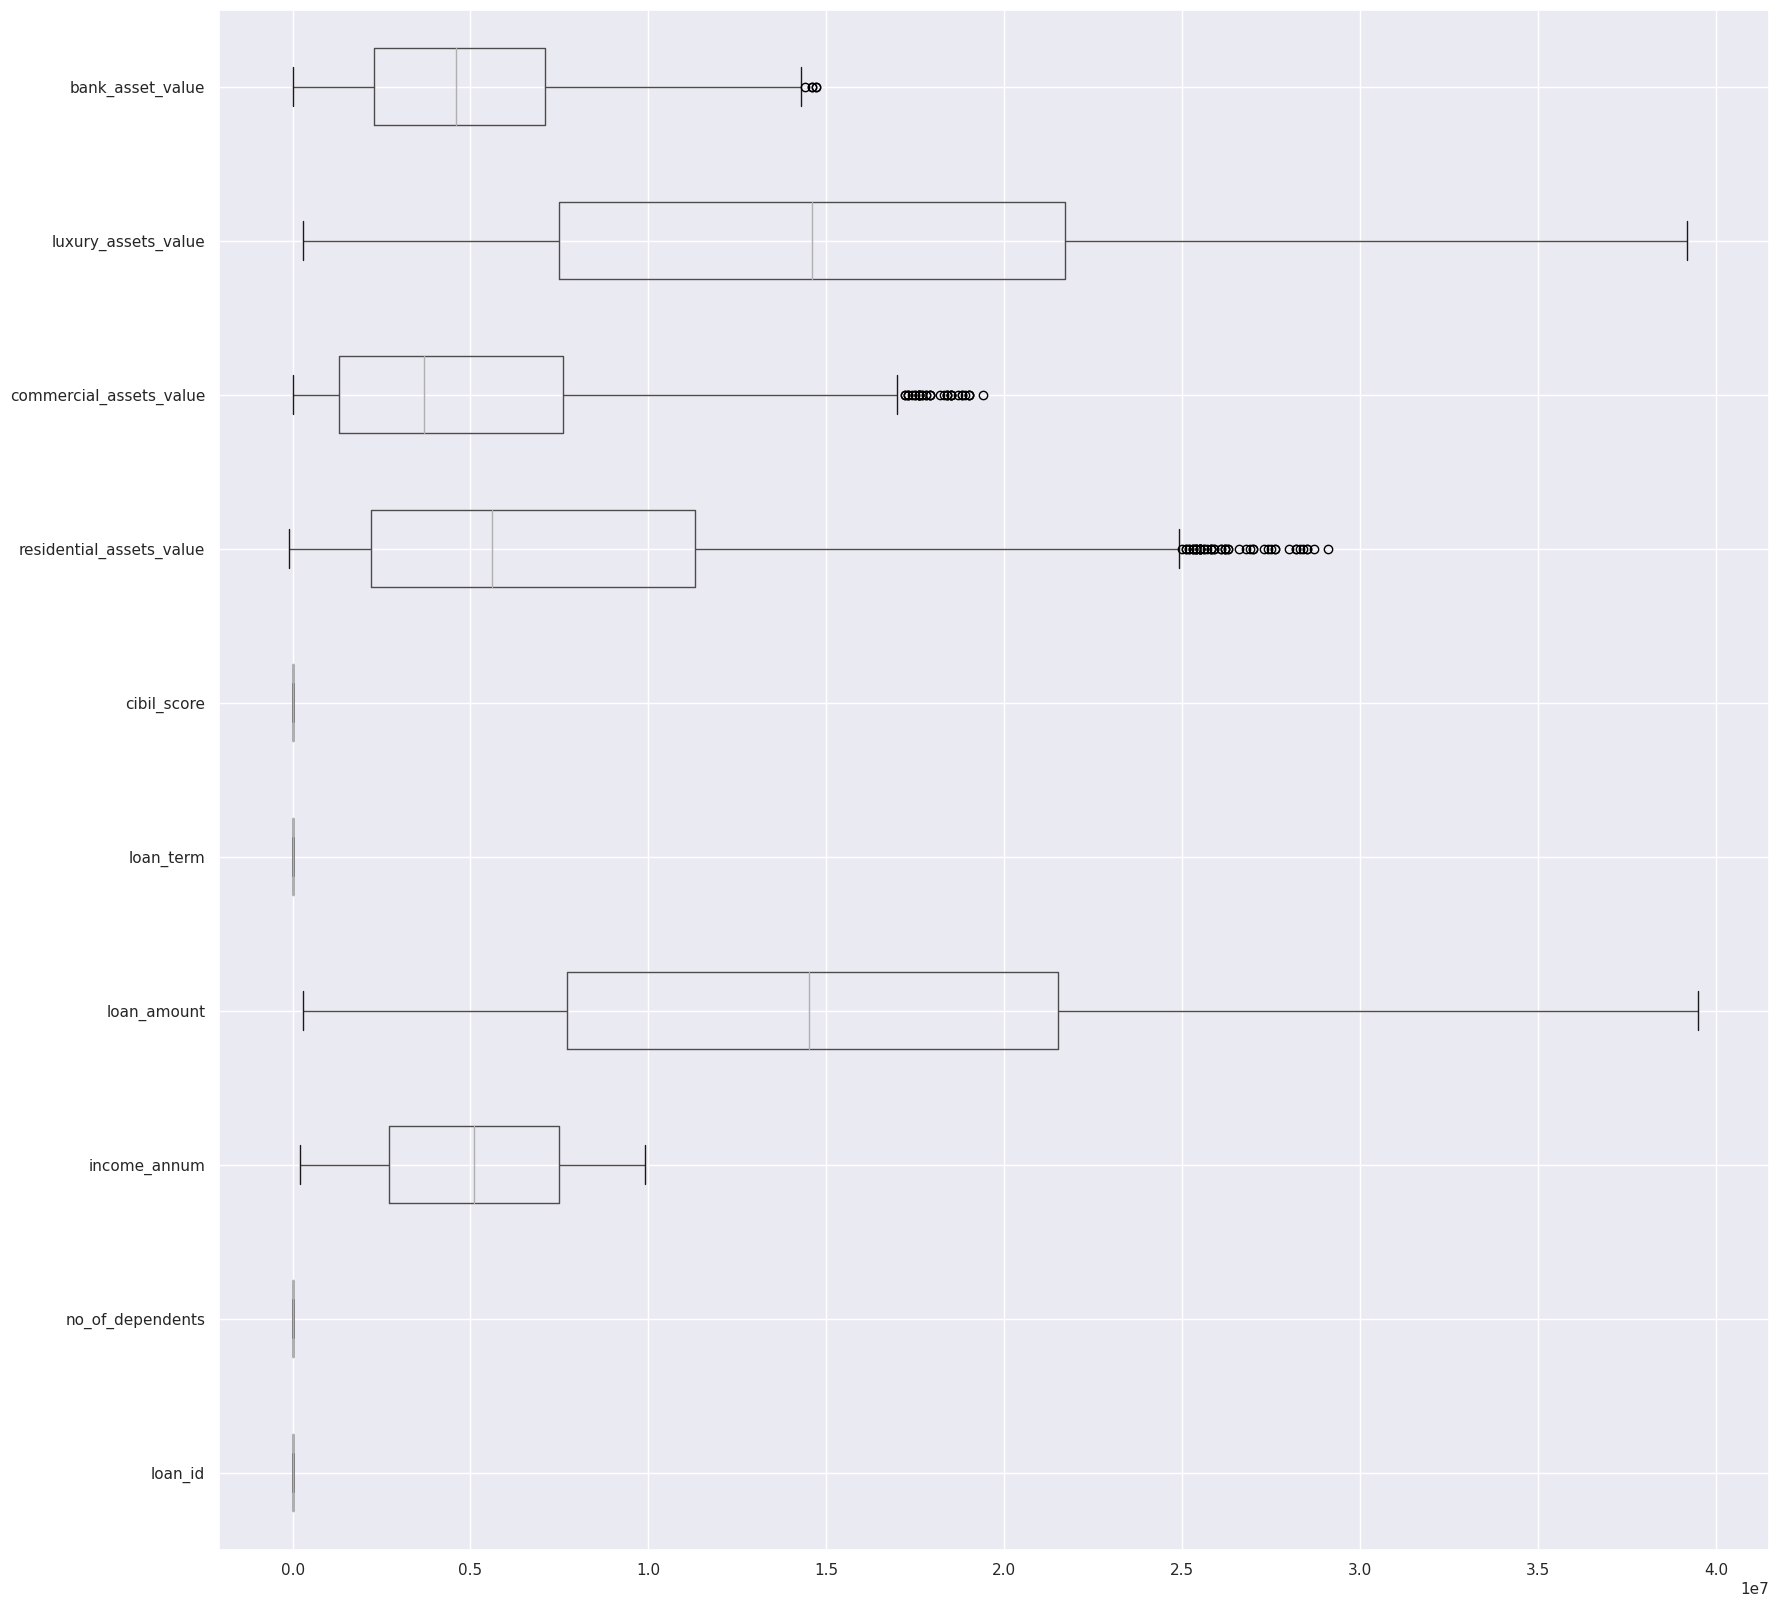

In [ ]:
outliers_loan = dict(check_outlier(loan).sum())

sum_of_outliers = sum([ value for index, value in outliers_loan.items() ])

print(f"Jumlah outlier pada dataset sebesar {((sum_of_outliers/len(loan)) * 100):.2f}%\n\n")
loan.boxplot(vert=False,figsize=(20,20))

Terlihat dari boxplot bahwa pada atribut tersebut jumlah outlier dan relevansi outlier tersebut sangat kecil. Oleh karena itu, kita tidak memerlukan untuk menghapus outlier yang terjadi pada attribute tersebut. Hal ini tentunya merupakan hal yang "**normal**" karena pada dataset loan status merupakan data yang membutuhkan informasi tambahan. Kasus outlier ini tidak akan berpengaruh banyak pada modeling bahkan setelah mencoba, pembuangan baris yang terdapat outlier hanya membuat performa model memburuk (-0.0024). Hal ini saya asumsikan karena dataset loan_status data-data yang mempunyai outlier dapat memberikan gambaran lebih mengenai loan_status yang ada (misalnya apabila orang tersebut memiliki asset-asset yang banyak (orang dengan kekayaan yang besar), maka orang tersebut tentu saja memiliki data yang "abnormal" dibandingkan data-data lain. Oleh karena itu, data seperti itu dapat kita tinggalkan saja pada dataset.)

### 2. Persiapan Training [15]

Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus Anda lakukan :
* `Lakukan encoding terhadap fitur-fitur yang masih dalam bentuk kategorikal`. Anda dapat melakukan encoding dengan menggunakan library encoder apapun yang menurut Anda terbaik.

* `memilih dependent dan juga independent variables` Anda diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan Anda. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut Anda. Kalin juga bisa menggunakan teknik lain, seperti mengecek korelasi atau melakukan literasi terkait pengajuan pinjaman yang biasa dilakukan di bank. Jangan lupa untuk menjelaskan asumsi yang Anda ambil. ( <i> Hint </i> : Silakan eksplorasi pengambilan fitur dari jumlah kecil ke jumlah besar)


* `membagi dataset menjadi training dan testing` bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Pastikan juga pembagian training dan testing <b>merata</b> berdasarkan target atribut (<i>Hint</i> : perhatikan parameter yang digunakan pada train split test yang digunakan sebelumnya).


* `lakukan standarisasi` Anda bebas memilih standarisasi apa yang menurut Anda merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa Anda menggunakan strategi tersebut. (<i>Hint</i> : perhatikan method yang digunakan saat standarisasi, jangan sampai keliru ketika melakukan standarisasi training dan testing).

**Catatan**: *Anda dapat menambahkan blok code maupun markdown sesuai dengan kebutuhan Anda.*

- Melakukan label encoding terhadap 3 atribut yaitu `education`, `self_employed`, `loan_status` karena berupa kategorikal data dimana urutan ordinalnya penting.

- Pemilihan dependent variabel: saya memilih variabel independen sebagai semua kolom kecuali `loan_status` dan `loan_id`. Saya membuang attribut `loan_status` karena atribut ini adalah variabel dependen yang dicari dan `loan_id` yang tidak relevan terhadap training maupun testing.

##### Melakukan encoding dan dependen variablenya.

In [ ]:
# Proses Encoding menggunakan Label encoding
loan_enc = ["education", "self_employed", "loan_status"]

for col in loan_enc:
  loan[col] = le.fit_transform(loan[col])

# Dependent variables

y_loan = loan["loan_status"]
y_loan.head()

# Variabel independen

x_loan = loan.drop(["loan_status", "loan_id"], axis = 1)

##### Melakukan pengecekan korelasi

<Axes: >

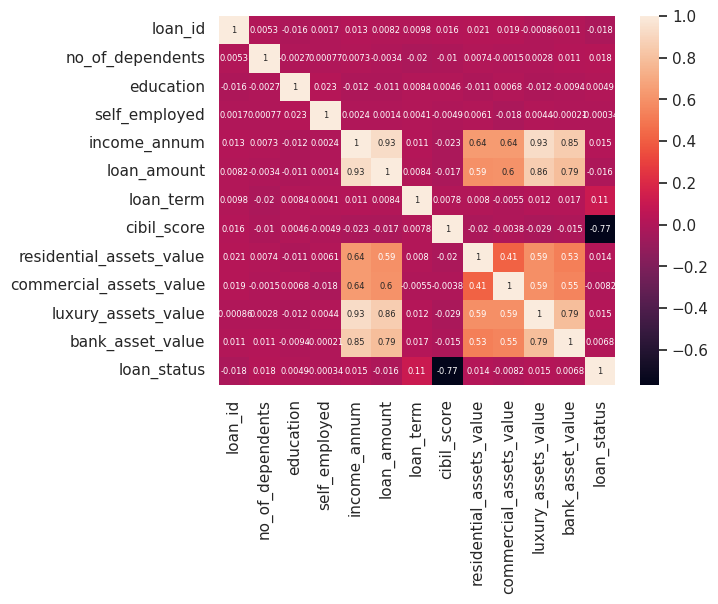

In [ ]:
correlation_matrix = loan.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

Berdasarkan korelasi diatas, dapat dilihat bahwa hanya terdapat 2 attribut yang memiliki korelasi (negatif maupun positif) yang baik dengan `loan_status`. Oleh karena itu, untuk sekarang saya akan memilih 4 `feature` terbaik terlebih dahulu saja. Hal ini saya lakukan karena pastinya kita mengambil akan 2 atribut yang berkorelasi besar, namun penambahan 2 korelasi lagi, menurut saya dapat meningkatkan *insight* pada model yang dibuat (sudah dicoba juga untuk lebih besar dari 4 tidak ada perbaikan pada model, bahkan ada terjadi penurunan).

##### Feature Selection dari Independent variable.

In [ ]:
k_selected = 4
# Feature Selection
selector = SelectKBest(f_classif, k=k_selected)
x_loan_selected = selector.fit_transform(x_loan, y_loan)

input_features = selector.feature_names_in_
selected_features= selector.get_feature_names_out(input_features=input_features)
print(f"{k_selected} Features that were selected: {selected_features}")

# Method stratify membuat merata.
X_loan_train, X_loan_test, y_loan_train, y_loan_test = train_test_split(x_loan_selected, y_loan, test_size = 0.2, stratify=y_loan,random_state = 123)

4 Features that were selected: ['no_of_dependents' 'loan_amount' 'loan_term' 'cibil_score']


##### Standarisasi

Kegiatan stadarisasi pada **kasus ini** sendiri menurut saya tidak akan berpengaruh banyak terhadap performa model yang kita. Hal ini dapat dilihat karena fitur-fitur yang kita dapatkan melalui *feature selection* merupakan fitur dengan perbedaan nilai yang tidak terlalu signifikan.

Namun perlu diingat, dalam banyak kasus bisa saja standarisasi berdampak efektif. Mengapa? karena ukuran standar deviasi yang digunakan dapat berdampak besar.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Perhatikan bahwa saya tidak menggunakan MinMaxScaler karena proses MinMaxScaler adalah normalisasi, dan bukan standarisasi.
scaler = StandardScaler() # Menggunakan Z-Score sebagai scalernya.

X_loan_train_scaled = scaler.fit_transform(X_loan_train)
X_loan_test_scaled = scaler.transform(X_loan_test)

### 3. Implementasi Naive Bayes [25]

Pada tahapan ini, Anda diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (**berikan alasan yang sesuai**).

***Tips***: <br>Ingat bahwa model kita ingin memprediksi apakah pinjaman dapat diterima atau tidak. Oleh karena itu, pilihlah model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

<b><i> Hint </i></b> : <br>
Liat distribusi nilai dari setiap feature yang telah Anda pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, Anda bisa menentukan model apa yang optimal.


**Catatan:**
*Anda diperbolehkan menggunakan atau menambahkan cell dengan tipe markdown untuk memberikan komentar atau catatan.*

##### Melakukan pengecekan terhadap Distribusi Data

Pada tahap ini, saya akan mencoba untuk memperlihatkan distribusi data ini. Melalui distribusi data ini, saya ingin melihat bahwa data yang dimiliki bersifat ***imbalanced*** atau tidak. Sifat dari distribusi dataset ini penting untuk dilihat agar kita dapat menentukan model naive bayes yang tepat. Kita tahu bahwa nilai dari atribut-atribut yang sudah di scale bersifat kontinu sehingga itu tidak perlu dibuktikan lagi. Sekarang, kita perlu menentukkan apabila kita perlu memastikkan apabila datanya benar-benar *balanced* atau tidak.

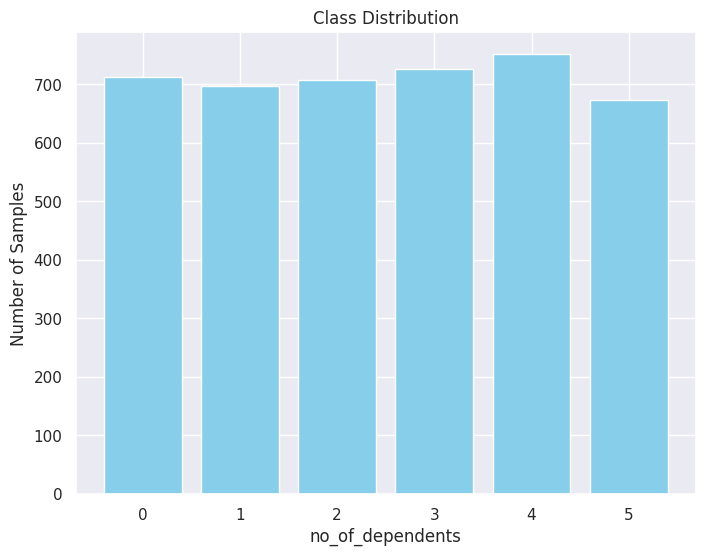

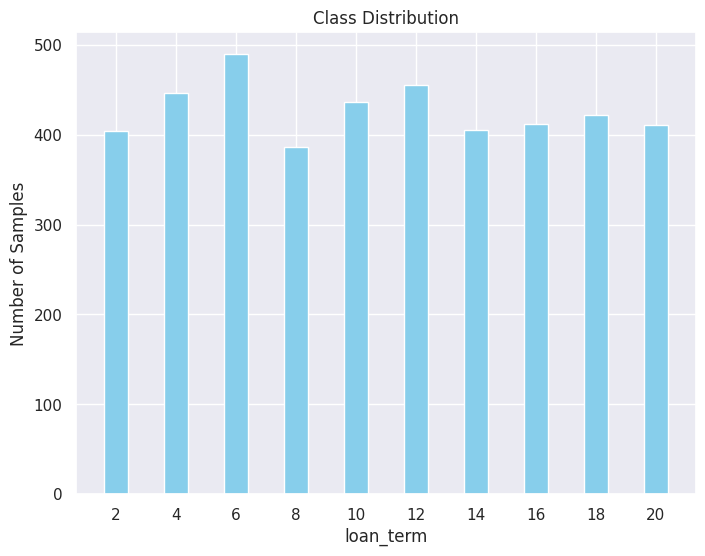

In [ ]:
for col in [feature for feature in selected_features if (feature != "cibil_score" and feature != "loan_amount")]:
  class_counts = x_loan[col].value_counts()
  # x_loan_selected = array bagi fitur independen yang sudah di lakukan feature selection

  plt.figure(figsize=(8, 6))
  plt.bar(class_counts.index, class_counts.values, color='skyblue')
  plt.xlabel(col)
  plt.ylabel('Number of Samples')
  plt.title('Class Distribution')
  plt.xticks(class_counts.index)
  plt.show()

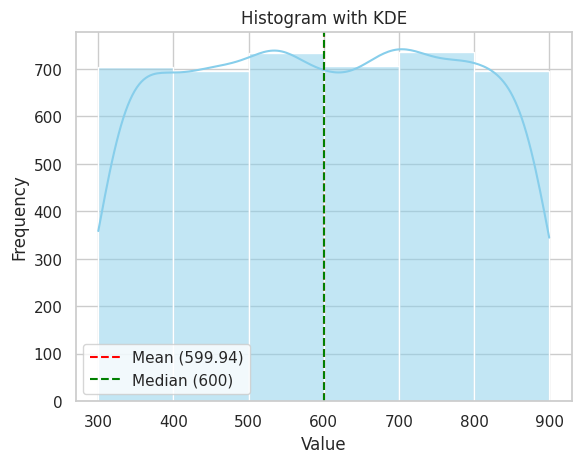

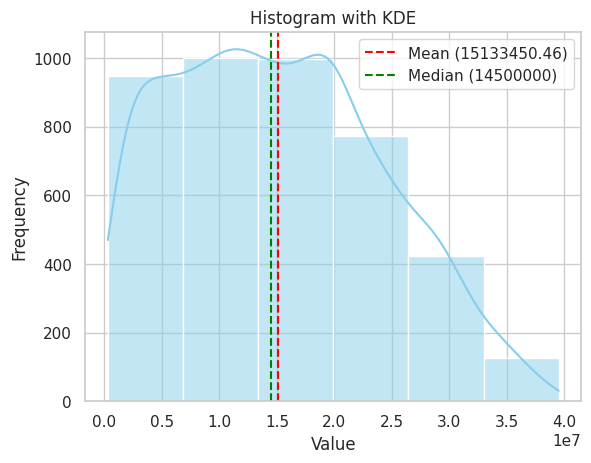

In [ ]:
temp = ["cibil_score", "loan_amount"]

for col in temp:
  sns.set(style="whitegrid")

  sns.histplot(x_loan[col], kde=True, color='skyblue', bins=6)

  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.title("Histogram with KDE")

  mean_val = sum(x_loan[col]) / len(x_loan[col])
  median_val = sorted(x_loan[col])[len(x_loan[col]) // 2]
  plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
  plt.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val})')
  plt.legend()

  plt.show()

Oleh karena itu, kita dapat memakai model Gaussian Naive Bayes karena sifat datanya yang kontinu`

##### Pembuatan model Naive Bayes (Gaussian Method)

In [ ]:
model_gnb_loan = GaussianNB()
model_gnb_loan.fit(X_loan_train_scaled, y_loan_train)

loan_prediction = model_gnb_loan.predict_proba(X_loan_test_scaled)

final_loan_predictions = np.argmax(loan_prediction, axis=1)

evaluate_classifier_performance(final_loan_predictions, y_loan_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       531
           1       0.92      0.92      0.92       323

    accuracy                           0.94       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.94      0.94      0.94       854



Confusion Matrix



prediction,0,1
actual,,
0,504,27
1,26,297




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9379391100702577
F1 Macro Average: 0.9340652937431808
F1 Micro Average: 0.9379391100702577
Precision Macro Average: 0.9338050314465409
Precision Micro Average: 0.9379391100702577
Recall Macro Average: 0.9343285931678649
Recall Micro Average: 0.9379391100702577



Berdasarkan informasi diatas, dapat dikatakan bahwa performa model sudah tergolong baik.

### 4. Implementasi KNN [20]

Setelah mencoba model naive bayes, Anda diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN.

Berikut adalah langkah-langkah umum yang dapat Anda ikuti:
* Pilih nilai K yang terbaik menurut Anda dan lakukan analisis berdasarkan temukan Anda. Mulai dengan mengambil nilai K secara random terlebih dahulu pada percobaan pertama, lalu kemudian perbaiki dengan parameter tuning. Anda juga boleh mencoba untuk tuning parameter yang lain (tetapi tidak diwajibkan).
* Lakukan cross validation serta tampilkan rata-rata hasil evaluasi cross validationnya. Anda dapat menggunakan algoritma cross_validation yang sesuai menurut Anda sekalian. Beberapa yang dapat digunakan misalnya `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya.
* Cantumkan hasil evaluasi cross validationnya. Setelah itu, Berikan pula hasil evaluasi model dan berikan analisis Anda. Jika model kurang optimal, berikan saran perbaikan yang sesuai. Pilih juga parameter `metric` distance yang sesuai menurut Anda sesuai dengan karakteristik data yang diberikan.

**Hint**: Ingat bahwa model kita ingin memprediksi apakah pinjaman yang diajukan diterima atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

**Catatan:**
*Anda diperbolehkan menggunakan atau menambahkan cell dengan tipe markdown untuk memberikan komentar atau catatan.*

##### Membuat KFold untuk validation

In [ ]:
# Mengatur jumlah neighbor yang digunakan.
N_LOAN_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold_loan = KFold(n_splits=4, shuffle=True, random_state=42)

##### Evaluasi KNN dengan nilai Neighbour (K) secara random (4).

Pada bagian ini saya akan menggunakan nilai neighbour yang random sesuai dengan deskripsi soal pertama. Nanti pada akhir evaluasi dengan K random ini, saya akan memperlihatkan pengunaan parameter tuning untuk nilai k dan distance tersebut.

In [ ]:
metrics = ["euclidean", "manhattan", "minkowski", "chebyshev", "jaccard"]

for metric in metrics:
  KNN_loan= KNeighborsClassifier(n_neighbors=N_LOAN_NEIGHBORS, metric=metric)

  KNN_loan.fit(X_loan_train_scaled,y_loan_train)

  loan_scores = cross_val_score(KNN_loan, X_loan_train_scaled, y_loan_train, scoring='accuracy', cv=kfold_loan)
  print(f'Hasil Evaluasi cross validation dengan metric distance {metric}: {loan_scores.mean()}')

  y_loan_pred = KNN_loan.predict(X_loan_test_scaled)

  evaluate_classifier_performance(y_loan_pred, y_loan_test)

Hasil Evaluasi cross validation dengan metric distance euclidean: 0.9212316496948365
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.96      0.83      0.89       323

    accuracy                           0.92       854
   macro avg       0.93      0.90      0.92       854
weighted avg       0.93      0.92      0.92       854



Confusion Matrix



prediction,0,1
actual,,
0,521,10
1,56,267




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9227166276346604
F1 Macro Average: 0.9152166064981948
F1 Micro Average: 0.9227166276346604
Precision Macro Average: 0.9334225953988325
Precision Micro Average: 0.9227166276346604
Recall Macro Average: 0.9038964976415782
Recall Micro Average: 0.9227166276346604

Hasil Evaluasi cross validation dengan metric distance manhattan: 0.9221108994017533
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.97      0.82      0.89       323

    accuracy                           0.92       854
   macro avg       0.94      0.90      0.91       854
weighted avg       0.93      0.92      0.92       854



Confusion Matrix



prediction,0,1
actual,,
0,524,7
1,59,264




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9227166276346604
F1 Macro Average: 0.9148214641930981
F1 Micro Average: 0.9227166276346604
Precision Macro Average: 0.9364845277955353
Precision Micro Average: 0.9227166276346604
Recall Macro Average: 0.9020773935503431
Recall Micro Average: 0.9227166276346604

Hasil Evaluasi cross validation dengan metric distance minkowski: 0.9212316496948365
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.96      0.83      0.89       323

    accuracy                           0.92       854
   macro avg       0.93      0.90      0.92       854
weighted avg       0.93      0.92      0.92       854



Confusion Matrix



prediction,0,1
actual,,
0,521,10
1,56,267




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9227166276346604
F1 Macro Average: 0.9152166064981948
F1 Micro Average: 0.9227166276346604
Precision Macro Average: 0.9334225953988325
Precision Micro Average: 0.9227166276346604
Recall Macro Average: 0.9038964976415782
Recall Micro Average: 0.9227166276346604

Hasil Evaluasi cross validation dengan metric distance chebyshev: 0.9197672630830435
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       531
           1       0.94      0.84      0.89       323

    accuracy                           0.92       854
   macro avg       0.93      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



Confusion Matrix



prediction,0,1
actual,,
0,514,17
1,51,272




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9203747072599532
F1 Macro Average: 0.9134225466342254
F1 Micro Average: 0.9203747072599532
Precision Macro Average: 0.9254554919312858
Precision Micro Average: 0.9203747072599532
Recall Macro Average: 0.9050450986222618
Recall Micro Average: 0.9203747072599532

Hasil Evaluasi cross validation dengan metric distance jaccard: 0.4507160291133923
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       531
           1       0.38      1.00      0.55       323

    accuracy                           0.38       854
   macro avg       0.19      0.50      0.27       854
weighted avg       0.14      0.38      0.21       854



Confusion Matrix



prediction,1
actual,
0,531
1,323




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.37822014051522246
F1 Macro Average: 0.27442650807136787
F1 Micro Average: 0.37822014051522246
Precision Macro Average: 0.18911007025761123
Precision Micro Average: 0.37822014051522246
Recall Macro Average: 0.5
Recall Micro Average: 0.37822014051522246



Rata-rata hasil evaluasi cross validationnya
- Euclidian: 0.9212316496948365
- Manhattan: 0.9221108994017533
- Minkowski: 0.9212316496948365
- Chebyshev: 0.9197672630830435
- Jaccard: 0.4507160291133923

Dapat dilihat bahwa evaluasi terbaik pada dengan K = 4 adalah dengan menggunakan metric disntance manhattan. Tidak hanya itu, terlihat pula bahwa model menghasilkan hasil evaluasi yang kurang baik saat menggunakan metric distance Jaccard. Hal tersebut karena Jaccard biasa digunakan untuk menghitung similarity atau dissimilarity di antara fitur-fitur binary/categorical. Oleh karena semua fitur kita sudah dalam bentuk numerik, maka Jaccard kurang baik dalam melakukan perhitungan jarak atribut-atribut tersebut sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik pula.

Oleh karena itu tentu saja, jaccard bukanlah merupakan distance metric yang tepat.

Berdasarkan hasil ini, kita bisa melihat bahwa metrik Manhattan memiliki nilai presisi rata-rata (dalam skala makro) yang lebih tinggi daripada metrik Euclidean. Namun, metrik Euclidean memiliki nilai F1-score rata-rata (dalam skala makro) yang sedikit lebih tinggi daripada metrik Manhattan.

Pada kasus ini, saya melihat presisi nya karena sesuai dengan deskripsi soal dimana terdapat pernyataan "**hasil evaluasi yang meminimalkan jumlah False Negative**", maka presisi merupakan nilai yang tepat untuk dilihat.

##### Evaluasi KNN dengan menggunakan **Parameter Tuning**

In [ ]:
model_loan = KNeighborsClassifier()
tunned_params_loan = [{'n_neighbors': [1,2,3,4,5,6,7,8, 9, 10, 11], 'metric': ["euclidean", "manhattan", "minkowski", "chebyshev", "jaccard"]}]

print("Tuning hyper-parameters model KNN Loan")
print()

clfKNNLoan = GridSearchCV(
    model_loan,
    tunned_params_loan,
    scoring="accuracy",
    cv=kfold,
    verbose = 2
)

clfKNNLoan.fit(X_loan_train_scaled, y_loan_train)

print()
print("Best parameters set found on development set:")
print(clfKNNLoan.best_params_)
print()
print("Detailed classification report:")
y_true_loan, y_pred = y_loan_test, clfKNNLoan.predict(X_loan_test_scaled)
evaluate_classifier_performance(y_pred, y_true_loan)
print()

Tuning hyper-parameters model KNN Loan

Fitting 4 folds for each of 55 candidates, totalling 220 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.1s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.1s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.1s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] EN

prediction,0,1
actual,,
0,516,15
1,29,294




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9484777517564403
F1 Macro Average: 0.9447437767634465
F1 Micro Average: 0.9484777517564403
Precision Macro Average: 0.9491226507526499
Precision Micro Average: 0.9484777517564403
Recall Macro Average: 0.9409840653478162
Recall Micro Average: 0.9484777517564403




Berdasarkan hasil diatas, kita peroleh bahwa nilai k yang paling optimal adalah 11 dengan metric distance manhattan.

Berdasarkan hasil diatas, model yang kita peroleh sudah optimal karena nilai akurasi diatas 94%. Nilai F1 Micro dan Accuracy kita juga sudah diatas 94%, hal ini menandakan bahwa model kita memiliki nilai false positive dan false negative yang rendah.

## BONUS ROUND: Kaggle Competition!



Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Naive Bayes dan KNN](https://www.kaggle.com/t/35a456050eff4d5883776bab3a71cc79)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [ ]:
edu = pd.read_csv('edu_sys_review_train.csv')
edu.head()

,Id,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,satisfaction_level
0,645,Male,Rural,Post Graduate,18,8,Laptop,Middle Class,10,2,...,2,Yes,No,yes,81-90,1,2,Practical,4,Bad
1,92,Female,Rural,Under Graduate,18,6,Mobile,Middle Class,5,2,...,2,Yes,No,No,71-80,5,5,Theory,10,Good
2,1020,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,6,4,...,2,No,Yes,No,81-90,4,3,Practical,7,Good
3,82,Male,Rural,Under Graduate,20,8,Laptop,Middle Class,7,5,...,2,No,Yes,No,71-80,4,4,Theory,7,Average
4,74,Female,Urban,Post Graduate,22,9,Mobile,Middle Class,6,3,...,2,No,No,No,71-80,4,3,Practical,7,Good


In [ ]:
# Looking data characteristics

print("Jumlah baris : ", edu.shape[0])
print("Jumlah kolom : ", edu.shape[1])

print(edu.info())

Jumlah baris :  826
Jumlah kolom :  24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Id                                                             826 non-null    int64 
 1   Gender                                                         826 non-null    object
 2   Home Location                                                  826 non-null    object
 3   Level of Education                                             826 non-null    object
 4   Age(Years)                                                     826 non-null    int64 
 5   Number of Subjects                                             826 non-null    int64 
 6   Device type used to attend classes                             826 non-null    object
 7   Economic status                 

Tidak ditemukan missing value pada dataset
Jumlah duplikasi data : 0
Outlier pada tiap atribut:
Age(Years)                                                       46
Are you involved in any sports?                                   0
Average marks scored before pandemic in traditional classroom     0
Clearing doubts with faculties in online mode                     0
Device type used to attend classes                                0
Do elderly people monitor you?                                    0
Economic status                                                   0
Engaged in group studies?                                         0
Family size                                                      46
Gender                                                            0
Have separate room for studying?                                  0
Home Location                                                     0
Id                                                                0
Interested in Gaming

<Axes: >

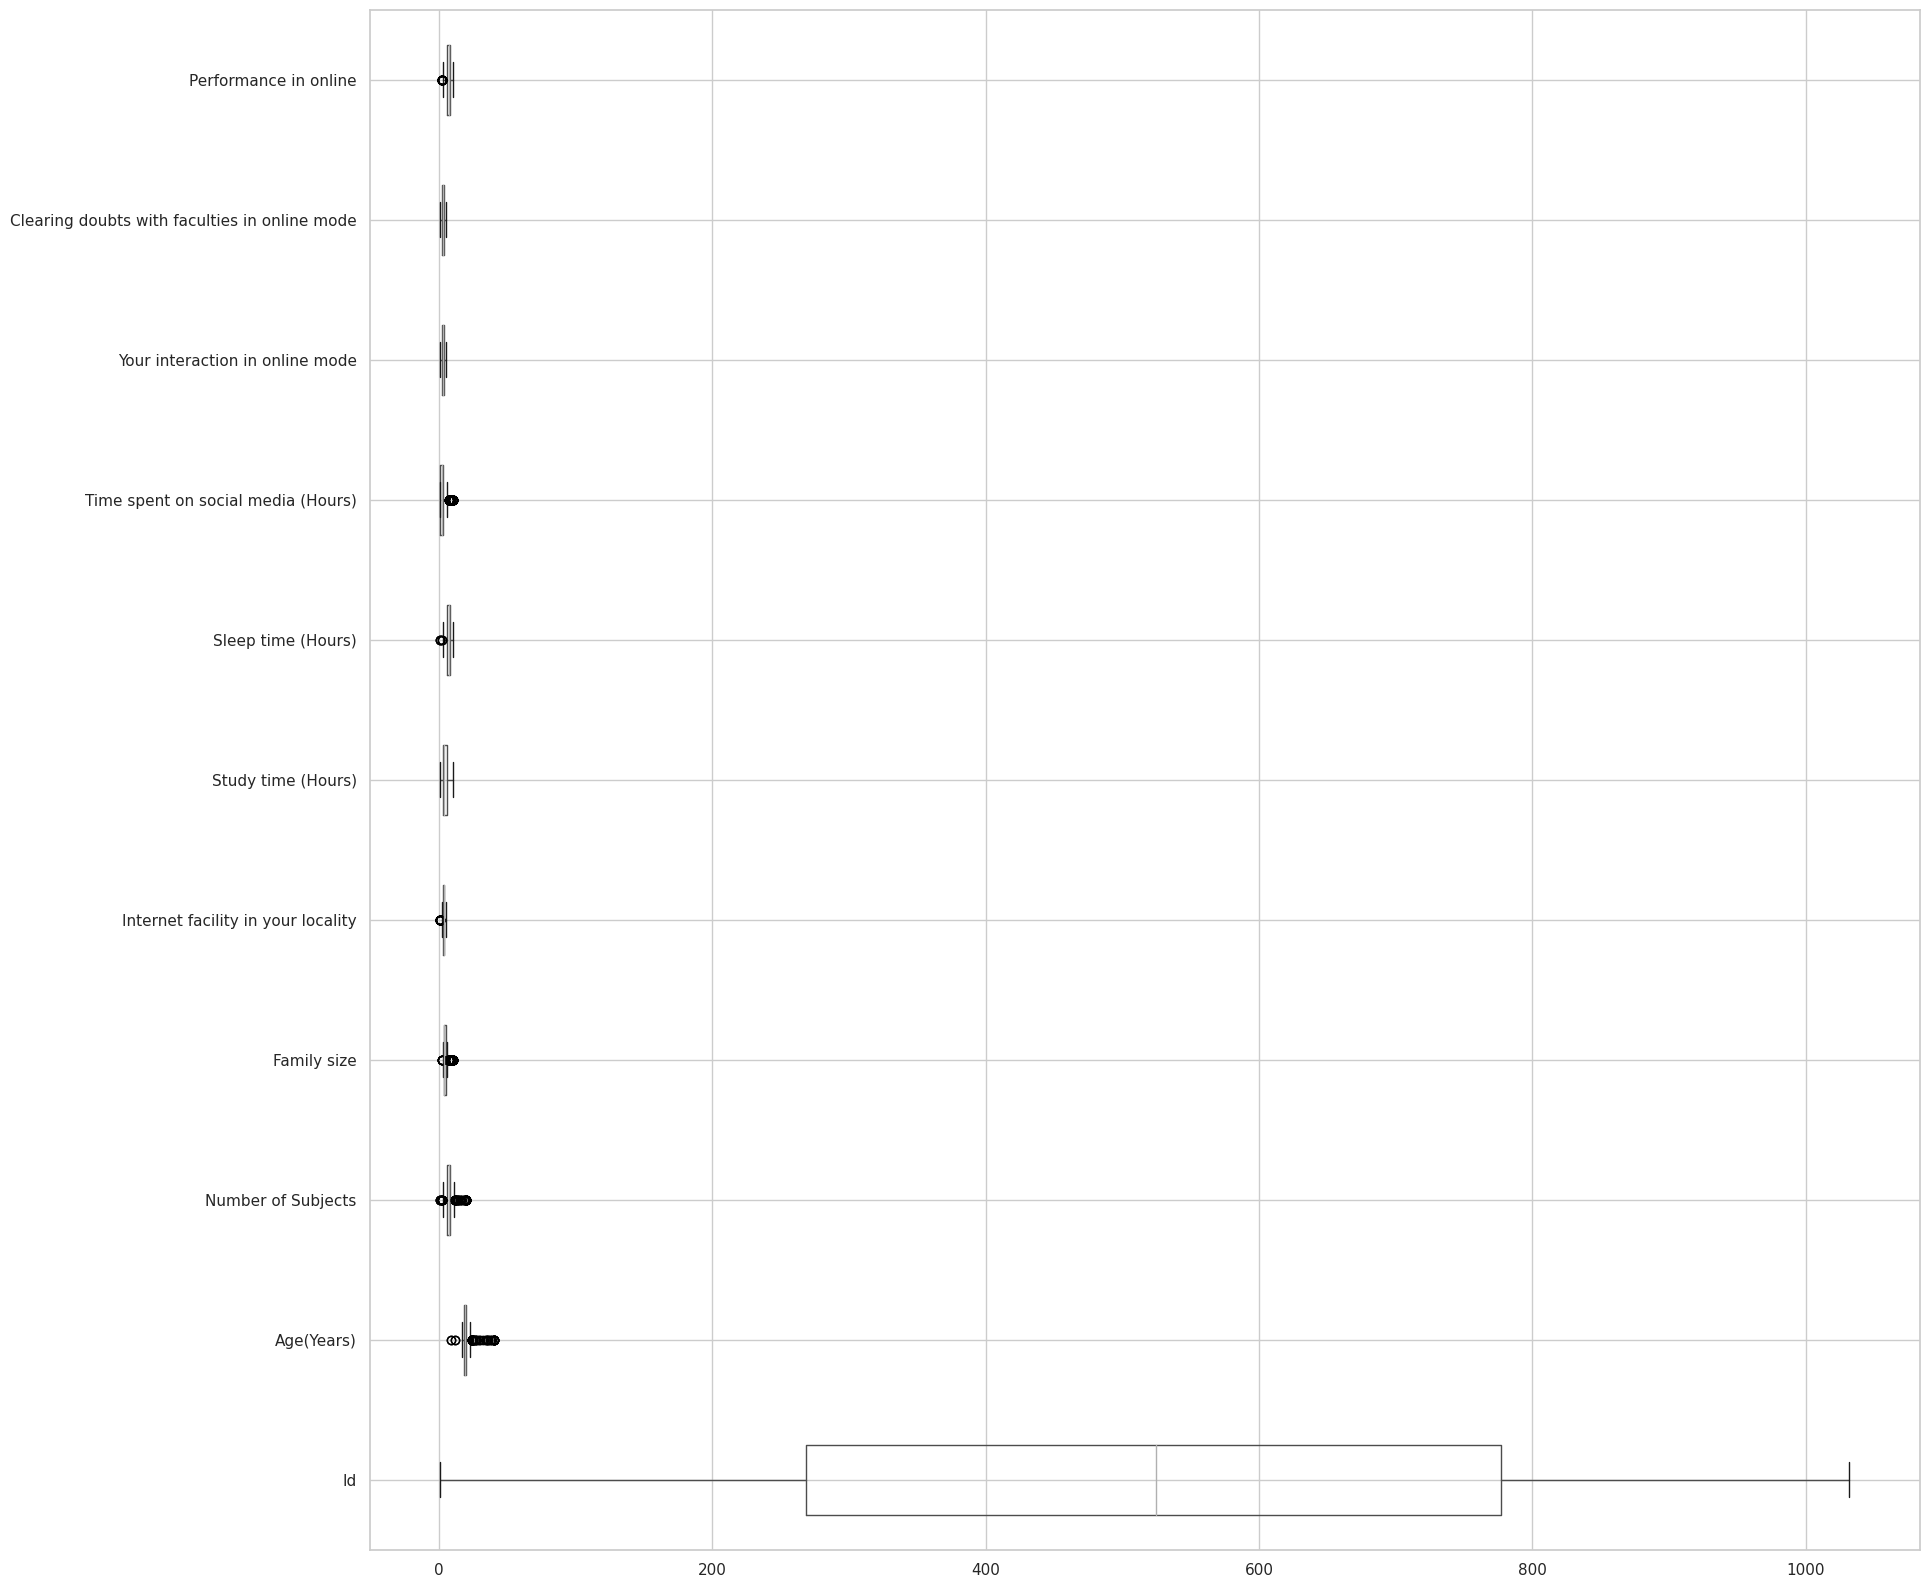

In [ ]:
# Preprocessing here!

check_null(edu)

print("Jumlah duplikasi data : " + str(edu.duplicated().sum()))

outliers_loan = dict(check_outlier(edu).sum())

# Asumsi datanya aman

# Coba remove outlier?
edu.boxplot(vert=False,figsize=(20,20))

In [ ]:
# Encode
def encode_step(df, label_edu_encode, ohc_edu_encode):
  le = LabelEncoder()

  for col in label_edu_encode:
    df[col] = le.fit_transform(df[col]) # label encoding

  df = pd.get_dummies(df, columns=ohc_edu_encode, prefix=ohc_edu_encode, drop_first=False)

label_edu_encode = ["Engaged in group studies?", "Have separate room for studying?", "Interested in Gaming?", "Do elderly people monitor you?", "Are you involved in any sports?", "Economic status", "Level of Education", "Average marks scored before pandemic in traditional classroom", "Gender", "Home Location", "Device type used to attend classes", "Interested in?"]
ohc_edu_encode = []

custom_mapping = {"Bad": 1, "Average": 2, "Good": 3}

edu["satisfaction_level"] = [custom_mapping[label] for label in edu["satisfaction_level"]]

encode_step(edu, label_edu_encode, ohc_edu_encode)

y_edu = edu["satisfaction_level"] # Dependen

X_edu = edu.drop(["satisfaction_level", "Id"], axis = 1) # Independen

       Id  Gender Home Location Level of Education  Age(Years)  \
0     645    Male         Rural      Post Graduate          18   
1      92  Female         Rural     Under Graduate          18   
2    1020  Female         Rural     Under Graduate          20   
3      82    Male         Rural     Under Graduate          20   
4      74  Female         Urban      Post Graduate          22   
..    ...     ...           ...                ...         ...   
821   781    Male         Urban     Under Graduate          20   
822   369  Female         Urban     Under Graduate          20   
823   308    Male         Urban     Under Graduate          20   
824   766    Male         Urban             School          19   
825   414    Male         Urban     Under Graduate          21   

     Number of Subjects Device type used to attend classes Economic status  \
0                     8                             Laptop    Middle Class   
1                     6                            

In [ ]:
print("Jumlah baris : ", X_edu.shape[0])
print("Jumlah kolom : ", X_edu.shape[1])

Jumlah baris :  826
Jumlah kolom :  22


<Axes: >

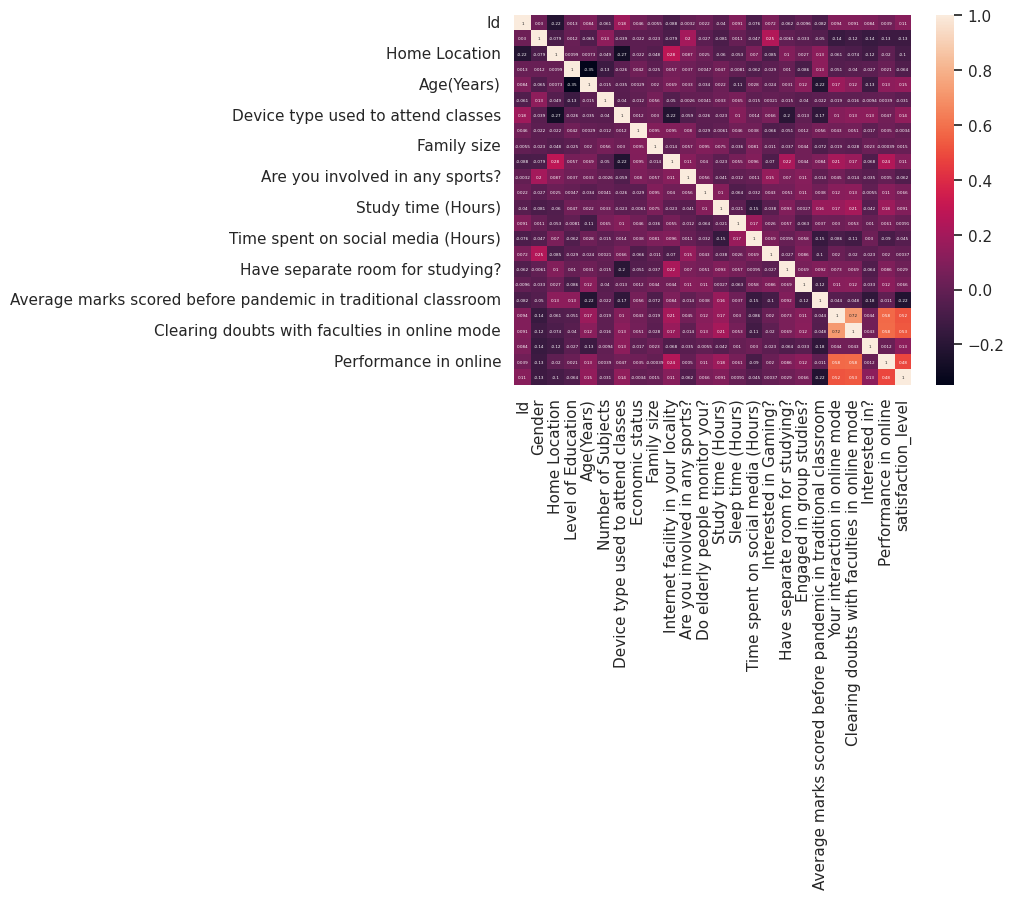

In [ ]:
# Check correlation
correlation_matrix = edu.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":3})

##### Memilih variabel terbaik

##### Melakukan splitting dataset

In [ ]:
X_edu_train, X_edu_test, y_edu_train, y_edu_test = train_test_split(X_edu, y_edu, test_size = 0.2, stratify=y_edu,random_state = 123)

##### Standarization

In [ ]:
scaler = StandardScaler()

In [ ]:
def scale(data):
  return scaler.fit_transform(data)

X_edu_train_scaled = scale(X_edu_train)
X_edu_test_scaled = scale(X_edu_test)

##### KNN

In [ ]:
# Will use hyperparameter tuning here

model_edu = KNeighborsClassifier()
cols = X_edu.shape[1]
tunned_params_edu = [{'n_neighbors': [i for i in range(1, cols + 1)],'metric': ["euclidean", "manhattan", "minkowski", "chebyshev", "jaccard"]}]

print("Tuning hyper-parameters model KNN Edu")
print()

clfKNNEdu = GridSearchCV(
    model_edu,
    tunned_params_edu,
    scoring="accuracy",
    cv=kfold,
    verbose = 2
)

clfKNNEdu.fit(X_edu_train_scaled, y_edu_train)

print()
print("Best parameters set found on development set:")
print(clfKNNEdu.best_params_)
print()
print("Detailed classification report:")
y_true_edu, y_pred = y_edu_test, clfKNNEdu.predict(X_edu_test_scaled)
evaluate_classifier_performance(y_pred, y_true_edu)
print()

Tuning hyper-parameters model KNN Edu

Fitting 4 folds for each of 110 candidates, totalling 440 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] EN

prediction,1,2,3
actual,,,
1,12,29,0
2,7,76,1
3,1,30,10




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.5903614457831325
F1 Macro Average: 0.49070731150228114
F1 Micro Average: 0.5903614457831325
Precision Macro Average: 0.6906846240179574
Precision Micro Average: 0.5903614457831325
Recall Macro Average: 0.4804490902051877
Recall Micro Average: 0.5903614457831325




##### Cek Prediction in Kaggle

In [ ]:
edu_test = pd.read_csv('edu_sys_review_test.csv')

df_test = edu_test[['Id']].copy()

label_edu_encode_test = ["Engaged in group studies?", "Have separate room for studying?", "Interested in Gaming?", "Do elderly people monitor you?", "Are you involved in any sports?", "Economic status", "Level of Education", "Average marks scored before pandemic in traditional classroom", "Gender", "Home Location", "Device type used to attend classes", "Interested in?"]
ohc_edu_encode_test = []

encode_step(edu_test, label_edu_encode_test, ohc_edu_encode_test)

X_edu_test_kaggle = edu_test.drop(columns=["Id"])

X_edu_test_kaggle = scale(X_edu_test_kaggle)

prediction = clfKNNEdu.predict(X_edu_test_kaggle)

df_test['satisfaction_level'] = prediction

df_test.to_csv('edu_kaggle.csv', index=False)

# ----Selesai----